We learned why **loops** are not a good choice in R and why **vectorization** is a better alternative. In this file, we'll learn some tips and syntax shortcuts we can use, including:

* Using **map functions** as a faster and simpler one-line code to replace loops.
* Creating single use functions called **anonymous functions**.

The dataset we'll use is in a format called [`JavaScript Object Notation (JSON)`](https://www.json.org/json-en.html). As the name indicates, JSON originated from the JavaScript language, but has now become a language-independent format. JSON is the main format used by servers to send data to webpages.

There are two types of objects in the JSON data:

* **List of values** It is identified by the square brackets, `[]`. It is a set of values or objects separated by commas.
* **Collection of name/value pairs** We identify it with curly brackets, `{}`. Each name/value pair of the collection is in the following format `"name" : value`. Commas separate the pairs.

From the R perspective:

* JSON list can be represented as R list.
* JSON Collection of name/value pairs can be represented as R dataframe.

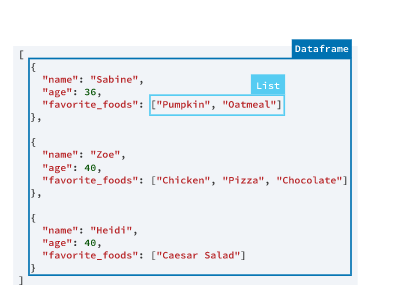

The R [`jsonlite` package](https://cran.r-project.org/web/packages/jsonlite/index.html) contains a number of functions to make working with JSON data easier. We can use the [`fromJSON()` method](https://cran.r-project.org/web/packages/jsonlite/vignettes/json-aaquickstart.html) to convert JSON data contained in a string to the equivalent set of R objects.

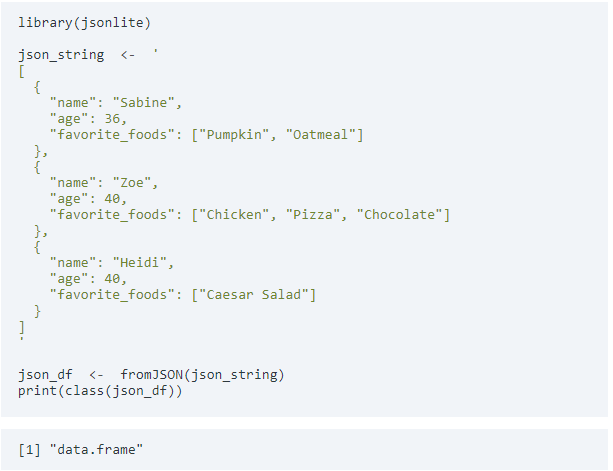

We can see that `json_string` has turned into a dataframe. Let's take a look at the structure of the dataframe using [`str()` function](https://stat.ethz.ch/R-manual/R-devel/library/utils/html/str.html):

`str(json_df)`

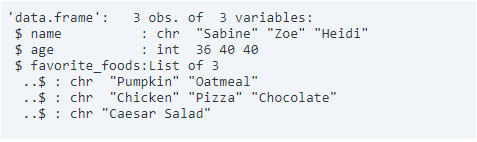

We can see the formatting from our original string is gone. The main dataframe contains three variables and the `favorite_foods` variable is itself a list.

Let's now take a look at the values in the dataframe:

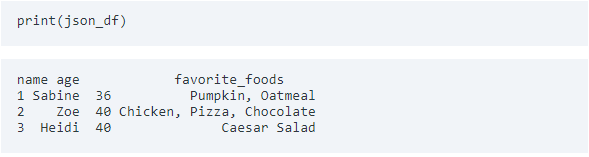

Here is the illustration of which transformations are taking place there:

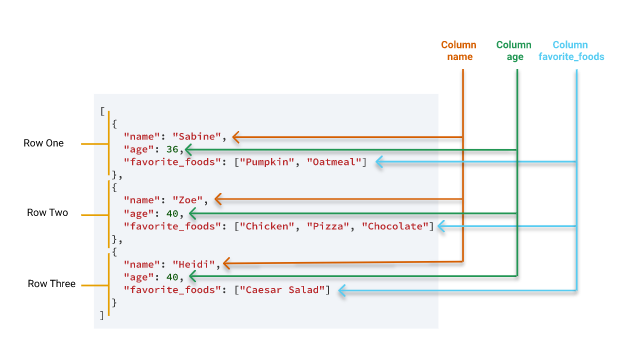

**Task**

`world_cup_str  <-  '
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
    ]
'`

**Answer**

`library(jsonlite)
world_cup_df  <-  fromJSON(world_cup_str)`

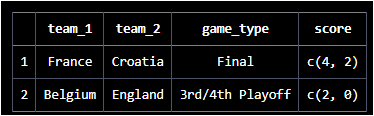

One of the places where the JSON format is commonly used is in the results returned by an [Application Programming Interface (**API**)](https://en.wikipedia.org/wiki/Application_programming_interface). APIs are interfaces that can be used to send and transmit data between different computer systems.

The dataset, `hn_2014.json` — was downloaded from the `Hacker News API`. It's a different set of data from the CSV we've been using , and it contains data about stories from Hacker News in 2014.

To read a file from JSON format, we use the `fromJSON()` function. Note that this function is the same as the one used above. However, instead of passing a string representing a JSON data as a parameter, the name of the JSON file is used. Let's look at how we would read that in our data:

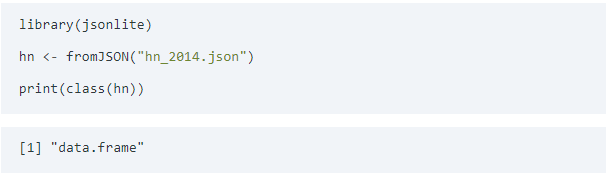

Our `hn` variable is a dataframe. Let's find out the structure of this dataframe, limiting the size of list to display to 2 because we cannot display all the dataframe. To do so, we will use `str()` function with `list.len` option:

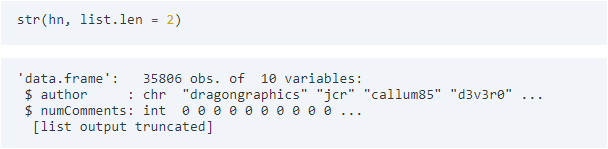

Our dataset contains 35,806 observations and 10 variables, where each observation represents a Hacker News story. In order to understand the format of our dataset, we'll print the variables of the dataframe using the R built-in `colnames()` function:

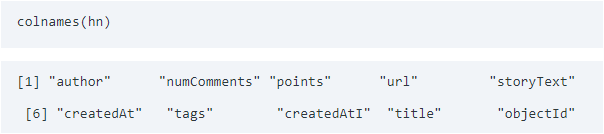

Here is a summary of the variables and the data they contain:

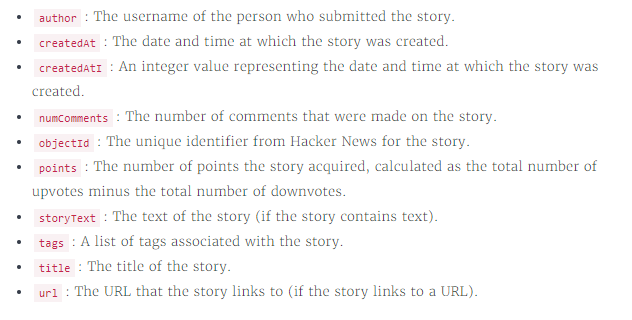

**Task**

* Reading Hacker News JSON file

**Answer**

`hn <- fromJSON("hn_2014.json")`

In data cleaning, the most important thing is to understand what data to clean. The analysis involves several explorations in order to find clues. We will try to detect duplicates of variables and delete them.

Let's look at the first observation in full.

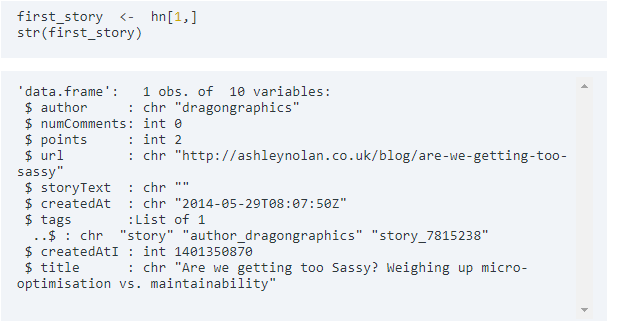

We may notice that the `createdAt` and `createdAtI` variables both have the date and time data in two different formats. Because the format of `createdAt` is much easier to understand, let's do some data cleaning by deleting the `createdAtI` variable from the dataframe.

One simple way of deleting a variable from a dataframe in R is to negate the name of this variable in the `select()` function: add the symbol `-` in front of the name of this variable. 

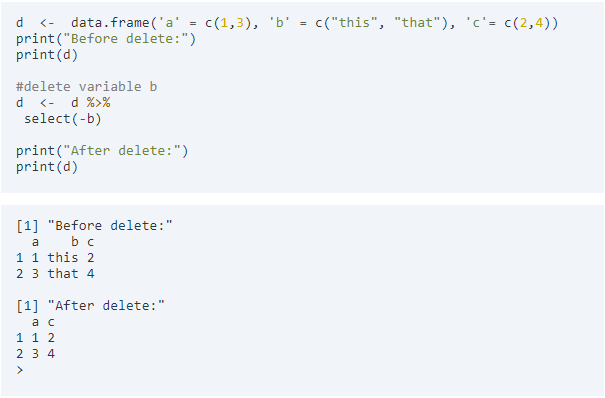

**Task**

* Remove the `createdAtI` variable from every story in our `Hacker News` dataset.

**Answer**

`library(dplyr)`

`hn_clean  <-  hn %>% select(-createdAtI)`

We learned many R vectorized functions that are functions to quickly perform operations on vector's elements. However, all functions are not vectorized. For example, let's try to use `class()` function to display the classes of variables in our dataset `hn`.

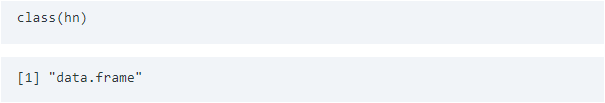

As we can see, the result is the class of the dataframe. It is not what we are expecting.

The problem is that the `class()` function does not support vectorization. There two ways to identify if a function support vectorization:

* Check the documentation of the function.
* Check manually, as we did here by running a quick code on it.

Let's now look at the result we have to obtain using a for-loop:

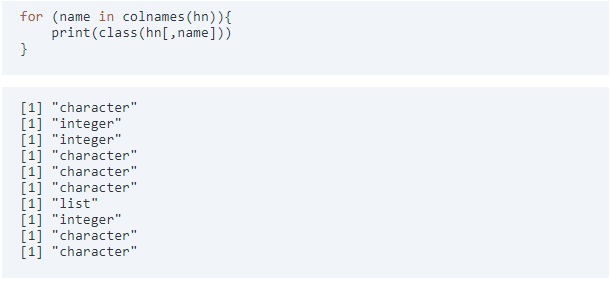

As We may know, using loops in R is not really common. Hence, what if we want to achieve this result without the for-loop ?

To solve this problem, we can use a very powerful tool in R: **map functions**. These functions are used when we don't want to use a loop to execute a function on each element of a given vector or list or dataframe or matrix.

The function `map()` requires two parameters:

* The **object** on which the iterations have to be done.
* The **name of the function** or a formula to use for each iteration.

The output of the `map()` function is a `list`. There are variations of the `map()` functional, which allow returning a vector in a specified data type.

* [`map_df()` function](https://purrr.tidyverse.org/reference/map.html) outputs a dataframe.
* [`map_lgl()` function](https://purrr.tidyverse.org/reference/map.html) outputs a logical vector.
* [`map_int()` function](https://purrr.tidyverse.org/reference/map.html) outputs an integer vector.
* [`map_dbl()` function](https://purrr.tidyverse.org/reference/map.html) outputs a double vector.
* [`map_chr()` function](https://purrr.tidyverse.org/reference/map.html) outputs a character vector.

**Task**

*  Use the `map_df()` function to replace the for-loop to display the classes of variables in our dataset `hn`

**Answer**

`library(purrr)
hn_classes <- map_df(hn_clean, class)`

As we can see, the `tags` variable is a list. Let's use the `map_int()` function to show the length of each list in the tags variable. We'll use this `map` because we want to output integer vector. In R, we can use the built-in functions `length()` to display the length of a list and `unique()` to output only the distinct values from a vector.

`tags_length <- map_int(hn_clean[,'tags'], length)`

`print(unique(tags_length))`

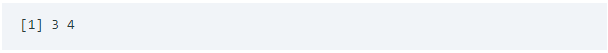

Let's use the same technique to look at the first element of each list in `tags` variable. The expecting output is a character vector; hence, we are going to use `map_chr()`.

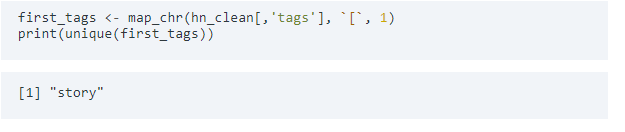

Indeed, the function of extracting an element from a list is `[`. Thanks to the optional parameters of map functions, we can indicate the index of the first element of the list. Note that in the code it is not quotation marks around `[`, but rather backticks.

Surprisingly, there is only a "story" string in the first element of each list. However, this is interesting information, because it reveals that the first element on the list is not important.

**Task**

* Use above technique to look at the second and third elements of each list in `tags` list. These output vectors contain only the distinct values.

**Answer**

`tags <- hn_clean[,'tags']
second_tags <- unique(purrr::map_chr(tags, `[`, 2))
third_tags <- unique(purrr::map_chr(tags, `[`, 3))`

Usually, we create functions when we want to perform the same task many times. What if we wanted to use a custom function because the existing functions do not satisfy what we want to do?

There are two ways to do so in R:

1. Write a separate function and use the name of this function, as was done for the R functions.
2. Use anonymous functions.

Let's use our demo JSON string:

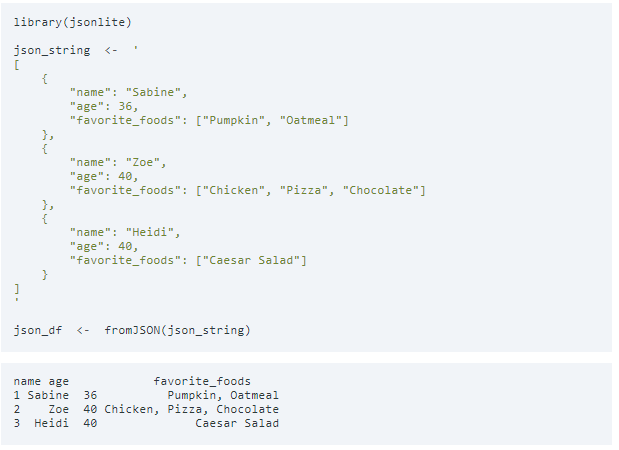

Let's focus on the food list:

`food_lists  <-  json_df[,'favorite_foods']`

We want to check which of the lists in `food_lists` have length 2. To do this, we will create the `check_foods_length()` function, which receives a list and output `"TRUE"` if this list is of length 2, and `"FALSE"` otherwise.

`check_foods_length <- function(x) {
     length(x) == 2
}`

This function can applied to any list.

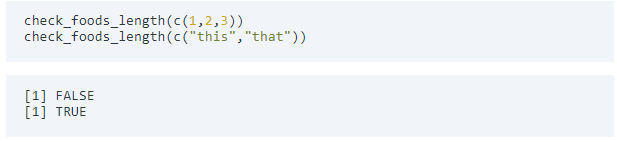

We can use `map()` function to apply this function to each list of `favorite_foods`. Then, we can use the `map_lgl()` function to output a logical vector applying `check_foods_length()` function to each list of the `food_lists`

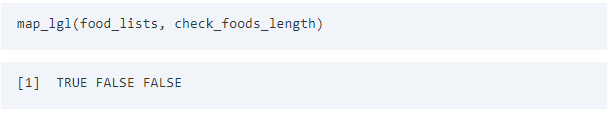

R provides a special syntax to create temporary functions when:

* There is only one instruction in the functions
* We don't want to reuse them for anything else

These functions are called **anonymous** functions. **Anonymous** functions can be defined in a single line, which allows us to define a function we want to pass as an argument at the time we need it.

To create a anonymous function equivalent of our one-instruction `check_foods_length()` function, we removed:

* The name of the function
* The assignment symbol
* The brackets

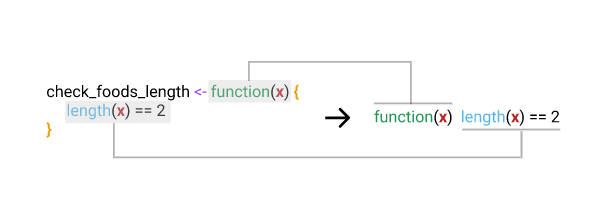

let's replace the `check_foods_length()` function by an anonymous function.

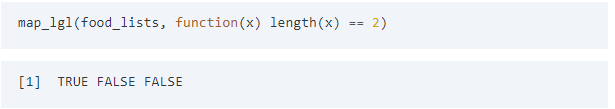

**Task**

* Creating an anonymous function to check which of the lists in `food_lists` have length 1 or 3.

`json_string  <-  "
[
    {
    "name": "Sabine",
    "age": 36,
    "favorite_foods": ["Pumpkin", "Oatmeal"]
    },
    {
    "name": "Zoe",
    "age": 40,
    "favorite_foods": ["Chicken", "Pizza", "Chocolate"]
    },
    {
    "name": "Heidi",
    "age": 40,
    "favorite_foods": ["Caesar Salad"]
    }
    ]"`
    
**Answer**

`json_df  <-  fromJSON(json_string)
food_lists  <-  json_df[,'favorite_foods']
food_lists_logical <- map_lgl(food_lists, function(x) length(x) == 1 |length(x) == 3 )`

With the same technique, we can check which of the lists in `tags_lists` from `hn_clean` dataset have length 2.

`tags_lists <- hn_clean[,'tags']
tags_lists_logical <- map_lgl(tags_lists, function(x) length(x) == 4)`

Let's use `tags_lists_logical` to filter out the rows which don't have tag list of length 4. To do so we can use the function `filter()` from the `dplyr` package.

`hn_tags4 <- hn_clean %>% filter(tags_lists_logical)`

`str(hn_tags4[1,])`

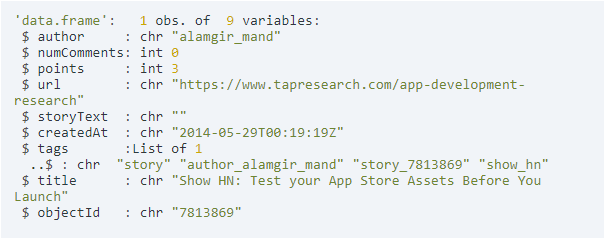

That is the first row of the new dataframe. There are 2,347 rows.

The two previous operations of finding which tag list is of length 4 and all the rows in `hn_clean` related to this can be done together, thanks to the power of tidyverse.

`hn_tags4 <- hn_clean %>% filter(map_lgl(tags, function(x) length(x) == 4))`

In the same way, let's create a new column in `hn_tags4` called, `point_labels`, that contains the value of the `points` variable followed by the string `"pts"`.

`library(stringr)`

`hn_tags4_new <- hn_tags4 %>%
    mutate(point_labels = map_chr(points, function(x) str_c(x,"pts")))`

`head(hn_tags4_new$point_labels)`

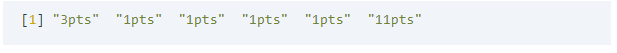

**Task**

* Use the same technique to create a new column containing the fourth tag in the `tags` variable from `hn_tags4` dataframe.

**Answer**

`hn_tags4 <- hn_clean %>% filter(map_lgl(tags, function(x) length(x) == 4))`
                   
`hn_tags4_new <- hn_tags4 %>% mutate(tag_4 = map_chr(tags, function(x) x[4]))`

The goal is to convert the dataframe of our JSON, embedding lists in the tags variable, into a simple dataframe containing only columns of atomic types — numeric, logical or character.

Considering our demo JSON string, here is the expected result:

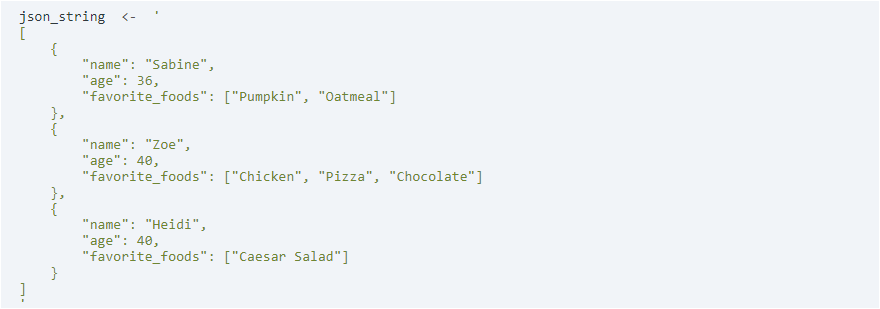

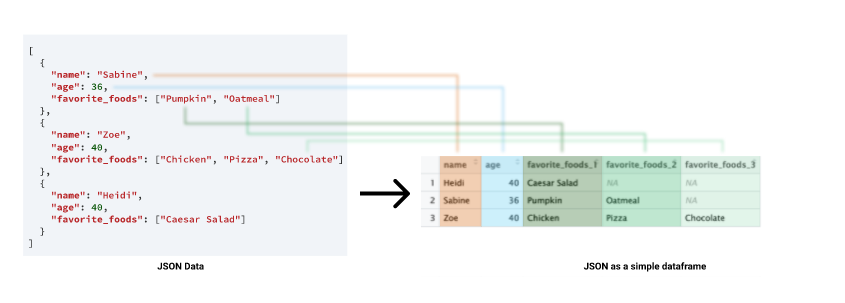

Here's how we can achieve this:

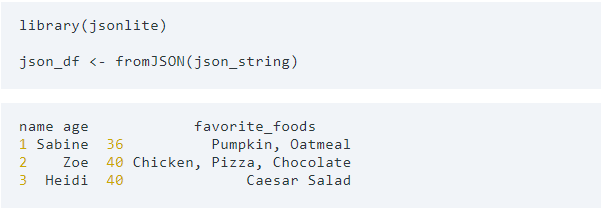

Try to unnest the JSON dataframe first. This operation consists of assigning each element of a list to a row by duplicating the other information in this row. To do this, there is a function with the same name,`unnest()`, in `tidyr` package. This function requires a parameter, `cols`, to specify the list of variables to which it will apply.

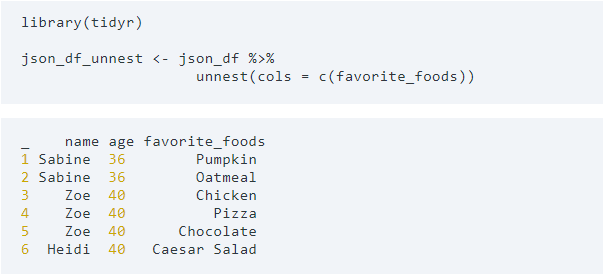

As we can see, the first row in `json_df` becomes two rows: one for `favorite_foods = Pumpkin`, and the other for the `favorite_foods = Oatmeal`.

Add a new column, `id_favorite_foods`, to the `json_df_unnest` dataframe to achieve the following result. This new column contains the string `"favorite_foods_"`, followed by the row number for each group of duplicated rows.

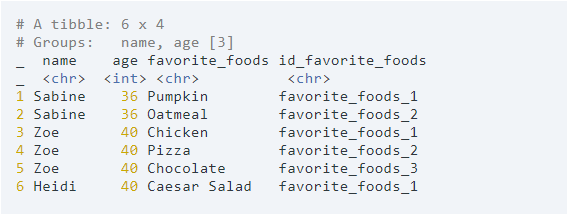

Spread the `id_favorite_foods` and `favorite_foods` variables into new columns `favorite_foods_1`, `favorite_foods_2`, and `favorite_foods_3` to achieve our goal:

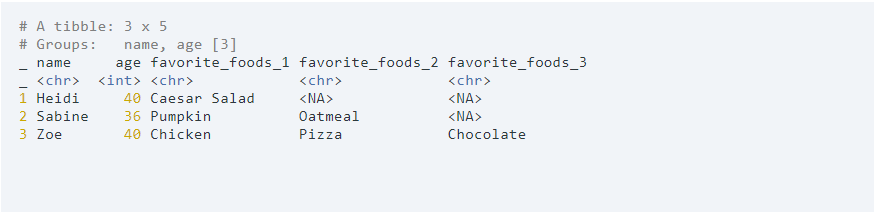

**Task**

* Apply above technique on `hn_clean` dataframe. 

    - Use the function `unnest()` from `tidyr` package to unnest the column `tags` of the dataframe `hn_clean_subset`.
    - Add a new column, `id_tag`, to the `hn_clean_subset` dataframe containing the string `"tag_"`, followed by the row number for each group of duplicated rows.
    - Expand the `id_tag` and `tags` variables into new columns `tag_1`, `tag_2`, `tag_3`, and `tag_4` using `pivot_wider()` function from tidyr package as well.

**Answer**

`library(tidyr)
library(stringr)`

`hn_clean_unnest <- hn_clean %>%
    unnest(cols = c(tags)) %>%
    group_by(author, numComments, points, url, storyText, createdAt, title, objectId) %>% 
    mutate(id_tag = str_c("tag_", row_number()))%>%
    pivot_wider(names_from = id_tag, 
                values_from = tags)`
                                       
`head(hn_clean_unnest)`